In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('./interpolation/Snoopy-small.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
# 定义放大倍数
scale = 10

# 获取原图像的宽和高
h, w = img.shape[:2]

# 定义目标图像的宽和高
new_h, new_w = h * scale, w * scale

In [4]:
# 计算横向和纵向上的缩放比例
ratio_h = new_h / h
ratio_w = new_w / w

In [5]:
# 创建目标图像数组
dst1 = np.zeros((new_h, new_w, 3), dtype=np.uint8)

In [6]:
# 最近邻插值
for i in range(new_h):
    for j in range(new_w):
        src_x = min(max(round(j / ratio_w), 0), w - 1)
        src_y = min(max(round(i / ratio_h), 0), h - 1)
        dst1[i, j] = img[src_y, src_x]
dst1.shape

(600, 800, 3)

In [7]:
# # 最近邻法放大
# dst1 = cv2.resize(img, (800, 600), interpolation=cv2.INTER_NEAREST)
# dst1.shape

Text(0.5, 1.0, 'Nearest-neighbor interpolation')

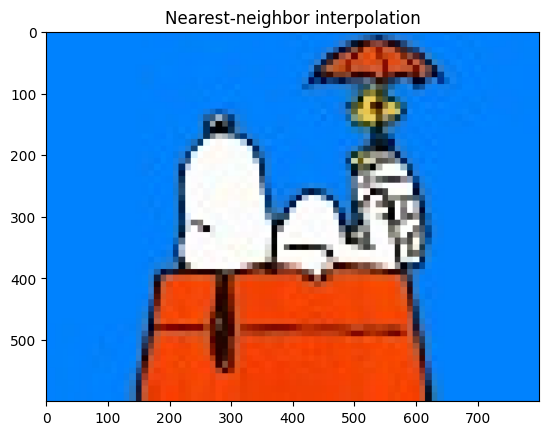

In [8]:
plt.imshow(dst1)
plt.title('Nearest-neighbor interpolation')

In [9]:
def bilinear_interpolation(x, y, p1, p2, p3, p4):
    r = (p1[2][0] * (p3[0] - x) * (p4[1] - y) +
            p3[2][0] * (x - p1[0]) * (p4[1] - y) +
            p2[2][0] * (p4[0] - x) * (y - p1[1]) +
            p4[2][0] * (x - p2[0]) * (y - p1[1])) / ((p3[0] - p1[0]) * (p4[1] - p1[1]) + 1e-10)
    g = (p1[2][1] * (p3[0] - x) * (p4[1] - y) +
            p3[2][1] * (x - p1[0]) * (p4[1] - y) +
            p2[2][1] * (p4[0] - x) * (y - p1[1]) +
            p4[2][1] * (x - p2[0]) * (y - p1[1])) / ((p3[0] - p1[0]) * (p4[1] - p1[1]) + 1e-10)
    b = (p1[2][2] * (p3[0] - x) * (p4[1] - y) +
            p3[2][2] * (x - p1[0]) * (p4[1] - y) +
            p2[2][2] * (p4[0] - x) * (y - p1[1]) +
            p4[2][2] * (x - p2[0]) * (y - p1[1])) / ((p3[0] - p1[0]) * (p4[1] - p1[1]) + 1e-10)
    return (int(r), int(g), int(b))

In [10]:
# 双线性插值法放大

# 定义目标图像的数组
dst2 = np.zeros((new_h, new_w, 3), dtype=np.uint8)

# 双线性插值法放大
for i in range(new_h):
    for j in range(new_w):
        src_x = i / scale
        src_y = j / scale
        x1 = int(src_x)
        x2 = x1 + 1
        y1 = int(src_y)
        y2 = y1 + 1
        if x2 >= h:
            x2 = h - 1
        if y2 >= w:
            y2 = w - 1
        p1 = (x1, y1, img[x1, y1])
        p2 = (x1, y2, img[x1, y2])
        p3 = (x2, y1, img[x2, y1])
        p4 = (x2, y2, img[x2, y2])
        pixel = bilinear_interpolation(src_x, src_y, p1, p2, p3, p4)
        dst2[i, j] = pixel

Text(0.5, 1.0, 'Bilinear interpolation')

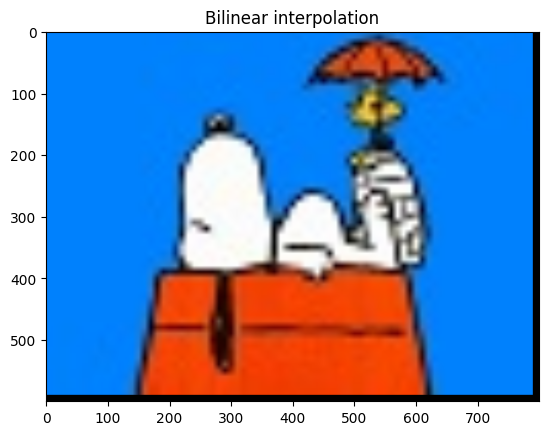

In [11]:
plt.imshow(dst2)
plt.title("Bilinear interpolation")

In [12]:
ori_img = cv2.imread('./interpolation/Snoopy-original.jpg')
ori_img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Origin Image')

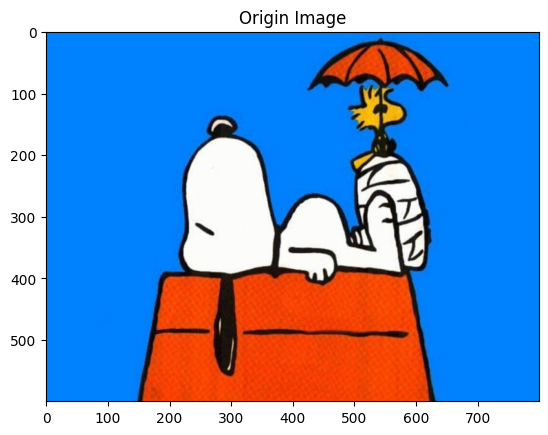

In [13]:
plt.imshow(ori_img)
plt.title("Origin Image")

In [14]:
def cropped_img(img, xs, xf, ys, yf):
    cropped_img = img[xs:xf, ys:yf]
    return cropped_img

In [15]:
xs = 100
xf = 300
ys = 200
yf = 400
ori_img_cropped = cropped_img(ori_img, xs, xf, ys, yf)
dst1_img_cropped = cropped_img(dst1, xs, xf, ys, yf)
dst2_img_cropped = cropped_img(dst2, xs, xf, ys, yf)

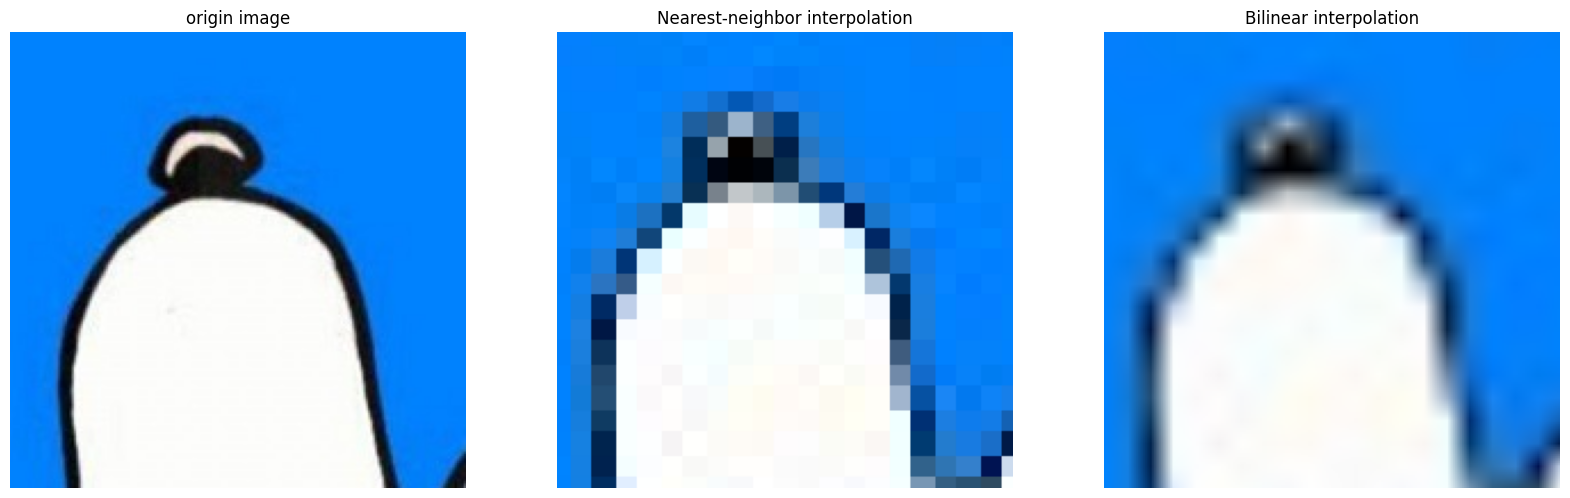

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(20, 20))
axs[0].imshow(ori_img_cropped, cmap='gray')
axs[0].set_title('origin image')
axs[0].axis('off')
axs[1].imshow(dst1_img_cropped, cmap='gray')
axs[1].set_title('Nearest-neighbor interpolation')
axs[1].axis('off')
axs[2].imshow(dst2_img_cropped, cmap='gray')
axs[2].set_title('Bilinear interpolation')
axs[2].axis('off')
plt.show()

In [17]:
xs = 0
xf = 400
ys = 400
yf = 600
ori_img_cropped = cropped_img(ori_img, xs, xf, ys, yf)
dst1_img_cropped = cropped_img(dst1, xs, xf, ys, yf)
dst2_img_cropped = cropped_img(dst2, xs, xf, ys, yf)

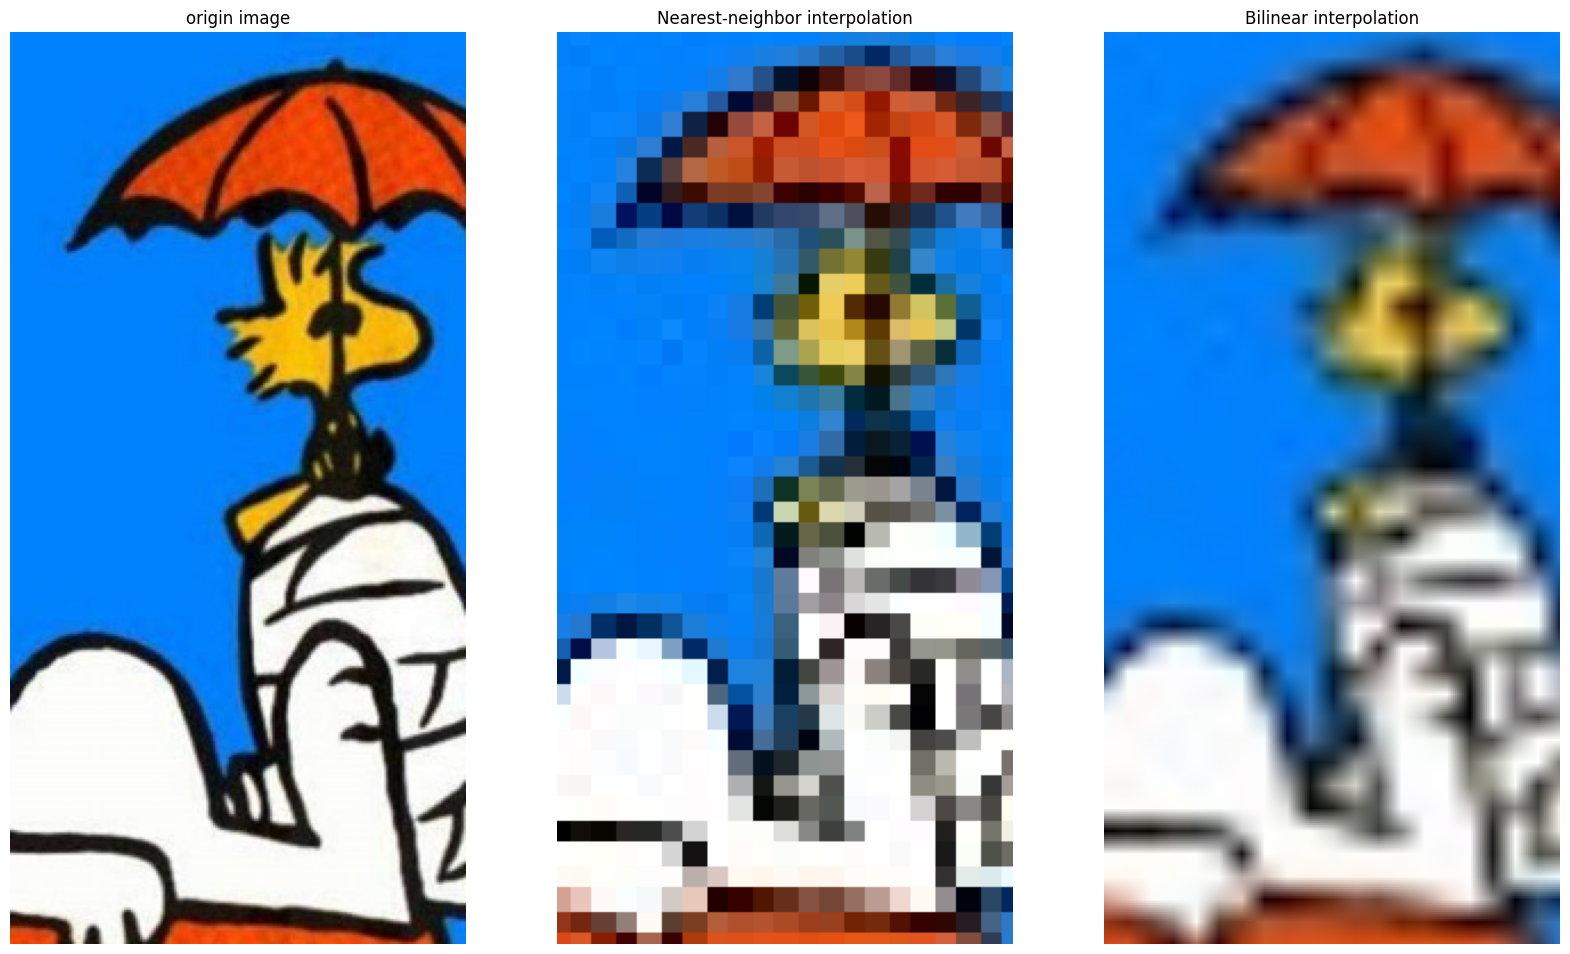

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(20, 20))
axs[0].imshow(ori_img_cropped, cmap='gray')
axs[0].set_title('origin image')
axs[0].axis('off')
axs[1].imshow(dst1_img_cropped, cmap='gray')
axs[1].set_title('Nearest-neighbor interpolation')
axs[1].axis('off')
axs[2].imshow(dst2_img_cropped, cmap='gray')
axs[2].set_title('Bilinear interpolation')
axs[2].axis('off')
plt.show()